In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
from skimage.morphology import disk, ball

#1 Thresholding

###1a Simple Global Thresholding

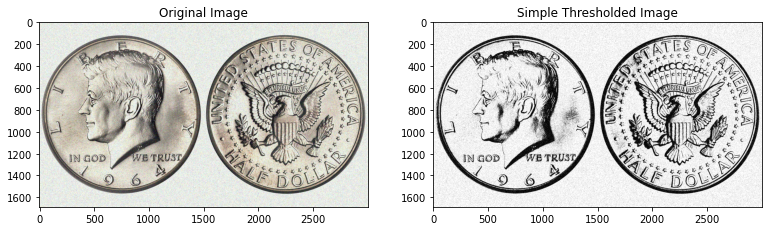

In [22]:
img = io.imread('noisy_coin.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray, 127, 255,
cv2.THRESH_BINARY)

# Show result
plt.figure(figsize=(20,15))

plt.subplot(131),plt.imshow(img)
plt.title('Original Image')
plt.subplot(132),plt.imshow(thresholded,cmap = 'gray')
plt.title('Simple Thresholded Image')
plt.show()


###1b Otsu’s Thresholding

In [18]:
def img_to_hist(img, ranges=256):
  plt.figure(figsize = (15,10))
  img_flat = util.img_as_ubyte(img).flatten()

  plt.subplot(1,1,1)
  plt.hist(img_flat, ranges, range = (0, ranges))
  plt.show()

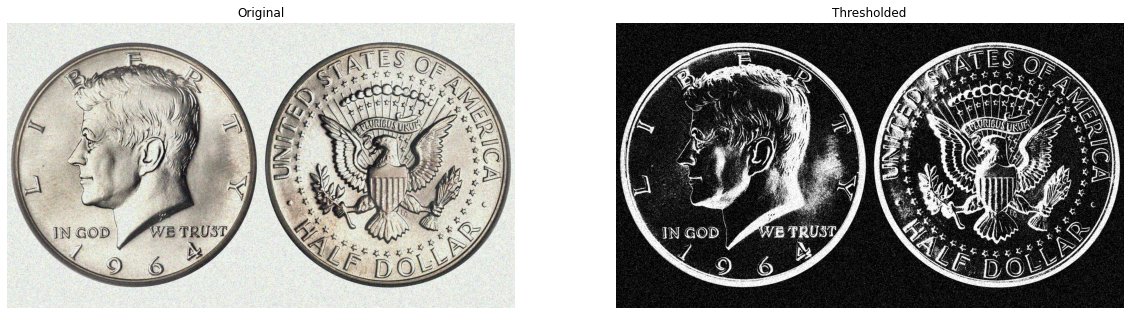

In [20]:
img2 = io.imread('noisy_coin.jpeg')
G = util.img_as_ubyte(color.rgb2gray(img2))
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img2)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded"); plt.axis("off")
plt.show()

###1c Perbedaan hasil 1a dengan 1b

> Pada hasil (a) global threshold berhasil memisahkan foreground dengan background namun tidak begitu optimal karena edge yang dihasilkan belum begitu jelas dan hampir mirip dengan gambar aslinya. Sedangkan pada hasil (b) menggunakan otsu's thresholding, edge detection dilakukan dengan lebih optimal di mana edge yang dihasilkan tampak lebih tegas. hal ini bisa terjadi karena pada global thresholding, nilai threshold yang digunakan berdasarkan histogram dari distribusi intensitas piksel keseluruhan gambar, sedangkan pada otsu's thresholding nilai global thresholding ditentukan ditentukan secara otomatis berdasarkan histogram dari citra dan diambil nilai yang paling sesuai.

###1d  Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?

> Berdasarkan hasil dari pengolahan kedua citra diatas dapat dilihat hasil thresholding dengan otsu menghasilkan hasil yang lebih optimal karena pemisahan antara foreground dengan background cukup kontras sehingga edge yang dihasilkan juga relatif lebih tegas dibandingkan global thresholding.

#2 Clustering

### 2a algoritma SLIC untuk melakukan segmentasi dengan variasi jumlah segmen 10, 50, dan 100.

In [23]:
from skimage.segmentation import mark_boundaries, slic

In [56]:
cat = io.imread('cat.jpg')

segments_slic = []

for n in [10,50,100]:
  segments_slic.append(slic(cat, n_segments=n, compactness=10,sigma=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


###2b Visualisasikan hasil (a) dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.


In [52]:
def superpixel_median_image(image, slic_labels):
  """
  Code taken from https://stackoverflow.com/a/57746835
  Turn image into superpixel image, given SLIC segment
  labels.
  """
  im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
  sli_1d= np.reshape(slic_labels,-1)
  uni = np.unique(sli_1d)
  new_img = np.zeros(im_rp.shape)
  for i in uni:
    loc=np.where(sli_1d==i)[0]
    #print(loc)
    mm=np.median(im_rp[loc,:], axis=0)
    new_img[loc,:]=mm
  return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')


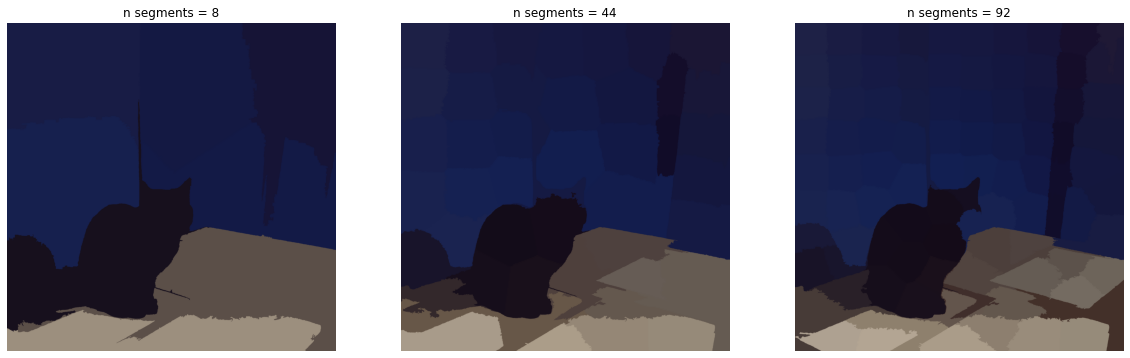

In [57]:
plt.figure(figsize=(20,10))

superpixel_1 = superpixel_median_image(cat, segments_slic[0])
superpixel_2 = superpixel_median_image(cat, segments_slic[1])
superpixel_3 = superpixel_median_image(cat, segments_slic[2])

plt.subplot(1,3,1); plt.imshow(superpixel_1)
plt.title(f'n segments = {len(np.unique(segments_slic[0]))}'); plt.axis("off")

plt.subplot(1,3,2); plt.imshow(superpixel_2)
plt.title(f'n segments = {len(np.unique(segments_slic[1]))}'); plt.axis("off")

plt.subplot(1,3,3); plt.imshow(superpixel_3)
plt.title(f'n segments = {len(np.unique(segments_slic[2]))}'); plt.axis("off")
plt.show()

###2c Berdasarkan hasil visualisasi (b), apa pengaruh jumlah segmen terhadap hasil segmentasi? Menurut anda, berapa jumlah segmen yang memberikan hasil terbaik

> Berdasarkan hasil visualisasi, jumlah segment mempengaruhi tingkat keakuratan pengelompokan variasi warna atau pixel dari citra aslinya. Menurut saya, jumlah segmen 100 memberikan hasil yang lebih baik karena dapat mengelompokkan pixel-pixel dari citra asli ke dalam kelompok yang lebih akurat.

###2d  Lakukan konversi citra “cat.jpg” ke dalam color space LAB. Kemudian, lakukan gamma correction pada channel L

(-0.5, 1831.5, 1831.5, -0.5)

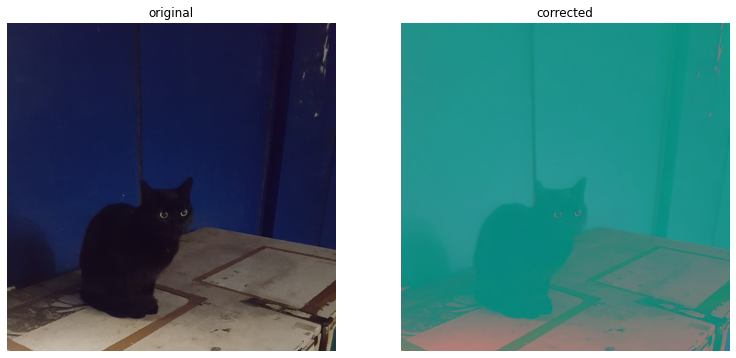

In [71]:
from skimage.exposure import adjust_gamma
cat2 = io.imread('cat.jpg')
LAB = cv2.cvtColor(cat2, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(LAB)
L2 = adjust_gamma(L, gamma=1.15)
LAB_gamma_corrected = cv2.merge([L2, A, B])

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(cat2)
plt.title('Original'); plt.axis("off")

plt.subplot(1,3,2); plt.imshow(LAB_gamma_corrected)
plt.title('Corrected'); plt.axis("off")

###2e Lakukan konversi citra yang diperoleh dari (d) kembali ke dalam color space RGB. Kemudian, lakukan segmentasi menggunakan algoritma SLIC dengan jumlah segmen 100.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


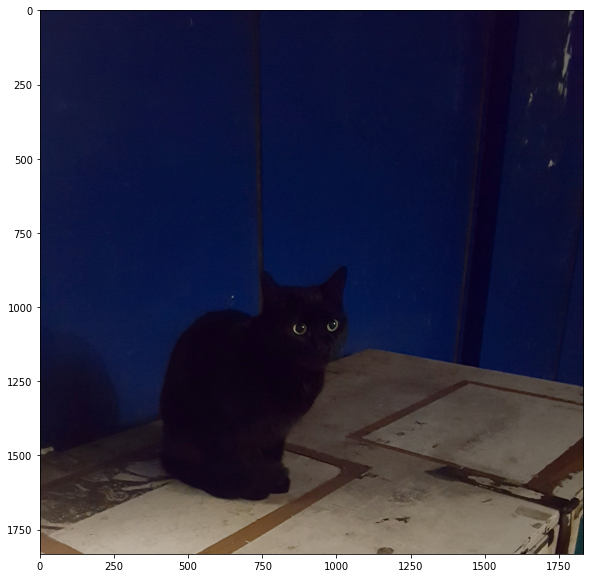

In [82]:
rgb_gamma_corrected = cv2.cvtColor(LAB_gamma_corrected, cv2.COLOR_LAB2BGR)
rgb_gamma_corrected = rgb_gamma_corrected.astype('uint8')

slic_segments = slic(rgb_gamma_corrected, n_segments=100, compactness=10, sigma=1)
plt.figure(figsize=(20,10))
plt.imshow(rgb_gamma_corrected)

##2f Lakukan penyeragaman piksel pada hasil (e) seperti yang anda lakukan pada (b). Bandingkan hasilnya dengan hasil (b) dengan jumlah segmen 100.

(-0.5, 1831.5, 1831.5, -0.5)

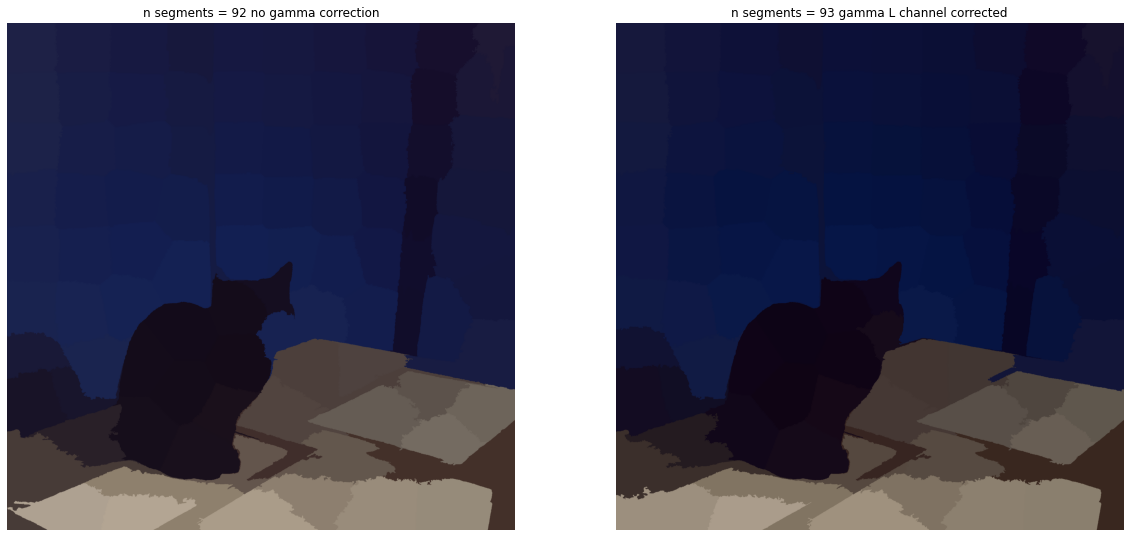

In [81]:
superpixel_gamma_corrected = superpixel_median_image(rgb_gamma_corrected, slic_segments)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(superpixel_3)
plt.title(f'n segments = {len(np.unique(segments_slic[2]))} no gamma correction'); plt.axis("off")

plt.subplot(1,2,2); plt.imshow(superpixel_gamma_corrected)
plt.title(f'n segments = {len(np.unique(slic_segments))} gamma L channel corrected'); plt.axis("off")

> Ya, terdapat perbedaan. Perbedaan utama terlihat pada bagian tubuh kepala dan leher pada kucing, di mana pada hasil (b) bagian tersebut hilang atau salah segmentasi,sedangkan hasil (e) tidak ada bagian warna pada tubuh yang hilang.

> Dugaan awal hal ini dapat terjadi karena pada citra awal terdapat perbedaan pixel-pixel pada area tersebut dengan bagian tubuh lainnya pada objek tersebut. Sehingga, setelah dilakukan *gamma correction* pada channel Lightness (L) pada citra tersebut, pixel-pixel pada bagian tersebut menjadi lebih mirip dengan bagian lainnya.